In [1]:
#Creted by : Sanjay Kumar N

In [2]:
import numpy as np  
import pandas as pd  

In [3]:
#Python method to get the csv path
def getData(path):
    path=path
    inputData = pd.read_csv(path)
    initData=inputData
    return inputData,initData

In [4]:
#Python method for handling nan values
#Numerical columns replaced with mean
#String columns replaced with mode
from collections import Counter
def dataCleaning(inputData,features,uniqueId,target):
    
    #if(uniqueId!=""):
    #    inputData = inputData.drop(uniqueId, axis=1)
    updatedData =  inputData[target]   
    dataForClean=pd.DataFrame()
    dataForClean=pd.concat([dataForClean,pd.DataFrame(inputData[uniqueId])],axis=1)
    for i in range(0,len(features)):
        dataForClean=pd.concat([dataForClean,pd.DataFrame(inputData[features[i]])],axis=1)
    dataForClean=pd.concat([dataForClean,pd.DataFrame(inputData[target])],axis=1)
    inputData=dataForClean
    for i in range(0,len(inputData.columns)):
        colName=inputData.columns[i]
        if( (inputData[colName].dtype.name=="object" and inputData[colName].dtype.name!= target) and colName != uniqueId):
            mode=Counter(inputData[colName])
            modeval= mode.most_common(1)[0][0]
            inputData[colName]= inputData[colName].replace(np.NaN, modeval)
        else:
            inputData[colName]= inputData[colName].replace(np.NaN, np.mean(inputData[colName]))
    
    return inputData,updatedData

In [5]:
#Python method for pre-processing the data
#Categorical variables are label and one hot encoded
def dataPreProcess(inputData,target):
    from sklearn import preprocessing 
    labelencoder= preprocessing.LabelEncoder()
    onehotencoder = preprocessing.OneHotEncoder(sparse=False)
    notencoded = pd.DataFrame()
    encoded = pd.DataFrame()
    colNames=[]
    for i in range(0,len(inputData.columns)):
        colNames.append(inputData.columns[i])
        
    for i in range(0,len(colNames)):
        colName=colNames[i]
        if( (inputData[colName].dtype.name=="object" and inputData[colName].dtype.name!= target) and colNames[i] != uniqueId):
            df =  labelencoder.fit_transform(inputData[colName])
            df = np.array(inputData[colName])
            df =   df.reshape(len(df),1)
            onehot_encoded = onehotencoder.fit_transform(df)
            onehot_encoded = pd.DataFrame(onehot_encoded)
            #onehot_encoded = onehot_encoded.drop(len(onehot_encoded.columns)-1,axis=1)
            encoded=pd.concat([onehot_encoded,encoded],axis=1)       
        else:
            notencoded=  pd.concat([notencoded,inputData[colName]],axis=1)
    combinedData=pd.concat([encoded,notencoded],axis=1)
    updatedData=pd.DataFrame()
    updatedData=pd.concat([updatedData,combinedData],axis=1) 
    Y = pd.DataFrame() 
    Y = pd.DataFrame(updatedData[target])
    del updatedData[target]
    X = pd.DataFrame()
    X = updatedData 
   
    return X,Y

In [6]:
def datasplit(X,Y,size):
    from sklearn.model_selection import train_test_split
    X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=size, shuffle=False)
    return X_train, X_test, Y_train, Y_test

In [7]:
#Python method for performing logistic regression
def KnnRegression(X_train, X_test, Y_train, Y_test): 
    from sklearn import neighbors
    from sklearn.metrics import mean_squared_error 
    from math import sqrt
    from sklearn.neighbors import NearestNeighbors
    
    model = neighbors.KNeighborsRegressor(n_neighbors = 3)
    model.fit(X_train, Y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,pred)) #calculate rmse
       
    return pred,error

In [8]:
#Calling all the fuctions step by step
path="F:\\Datasets\\nba_2013.csv"
uniqueId = ""
target = "pts"
features = ["pos","age","bref_team_id","g","gs","mp","fg","fga"]
testsize=0.2
data,initData = getData(path)
print(data)

if(uniqueId==""):
    uniqueId=uniqueId
    uniqueIdGenerator=np.arange(1,len(data))
    UqId=pd.DataFrame(list(uniqueIdGenerator),columns=["UniqueId"])
    data=pd.concat([UqId,data],axis=1)
    uniqueId=data.columns[0]
    
data,updatedData=dataCleaning(data,features,uniqueId,target)

X,Y=dataPreProcess(data,target)
X_train, X_test, Y_train, Y_test=datasplit(X,Y,testsize)
predictions,error=KnnRegression(X_train, X_test, Y_train, Y_test)
n=len(data)
p=len(features)
output1=pd.DataFrame(list(Y_test[target]),columns=["Actual"])
output2=pd.DataFrame(list(predictions),columns=["Predicted"])
prednactual=pd.concat([output1,output2],axis=1)
testStart=data[uniqueId][len(X_train):len(data)]
testStart=pd.DataFrame(testStart,columns=[uniqueId])
testStart.reset_index(drop=True, inplace=True)
prednactual.reset_index(drop=True, inplace=True)
prednactualfinal=pd.concat([testStart,prednactual],axis=1)

print(".........InputData............")
print(initData.head(5))

print(".............Unique and target variables..............")
print("UniqueId: ",uniqueId)
print("Target variable: ",target)

print(".........Input Data............")
print(data.head(5))


print(".........Output Data............")
print(prednactualfinal.head(5))

print(".............Evaluation metrics..............")
print("RMSE : ",error)



             player pos  age bref_team_id   g  gs    mp   fg   fga    fg.  \
0        Quincy Acy  SF   23          TOT  63   0   847   66   141  0.468   
1      Steven Adams   C   20          OKC  81  20  1197   93   185  0.503   
2       Jeff Adrien  PF   27          TOT  53  12   961  143   275  0.520   
3     Arron Afflalo  SG   28          ORL  73  73  2552  464  1011  0.459   
4     Alexis Ajinca   C   25          NOP  56  30   951  136   249  0.546   
..              ...  ..  ...          ...  ..  ..   ...  ...   ...    ...   
476     Tony Wroten  SG   20          PHI  72  16  1765  345   808  0.427   
477      Nick Young  SG   28          LAL  64   9  1810  387   889  0.435   
478  Thaddeus Young  PF   25          PHI  79  78  2718  582  1283  0.454   
479     Cody Zeller   C   21          CHA  82   3  1416  172   404  0.426   
480    Tyler Zeller   C   24          CLE  70   9  1049  156   290  0.538   

     ...  drb  trb  ast  stl  blk  tov   pf   pts     season  season_end  


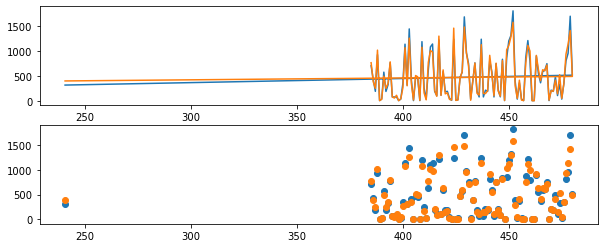

In [10]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1, figsize=(10,4))
y_axis_pred = prednactualfinal["Predicted"]
y_axis_actual = prednactualfinal["Actual"]
x_axis= prednactualfinal[uniqueId]
axes[0].plot(x_axis,y_axis_pred)
axes[0].plot(x_axis,y_axis_actual)
axes[1].scatter(x_axis,y_axis_pred)
axes[1].scatter(x_axis,y_axis_actual)
plt.show()
